In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
df = sns.load_dataset("iris")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = df.drop(columns=["species"])
y = df["species"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier

cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)

DecisionTreeClassifier()

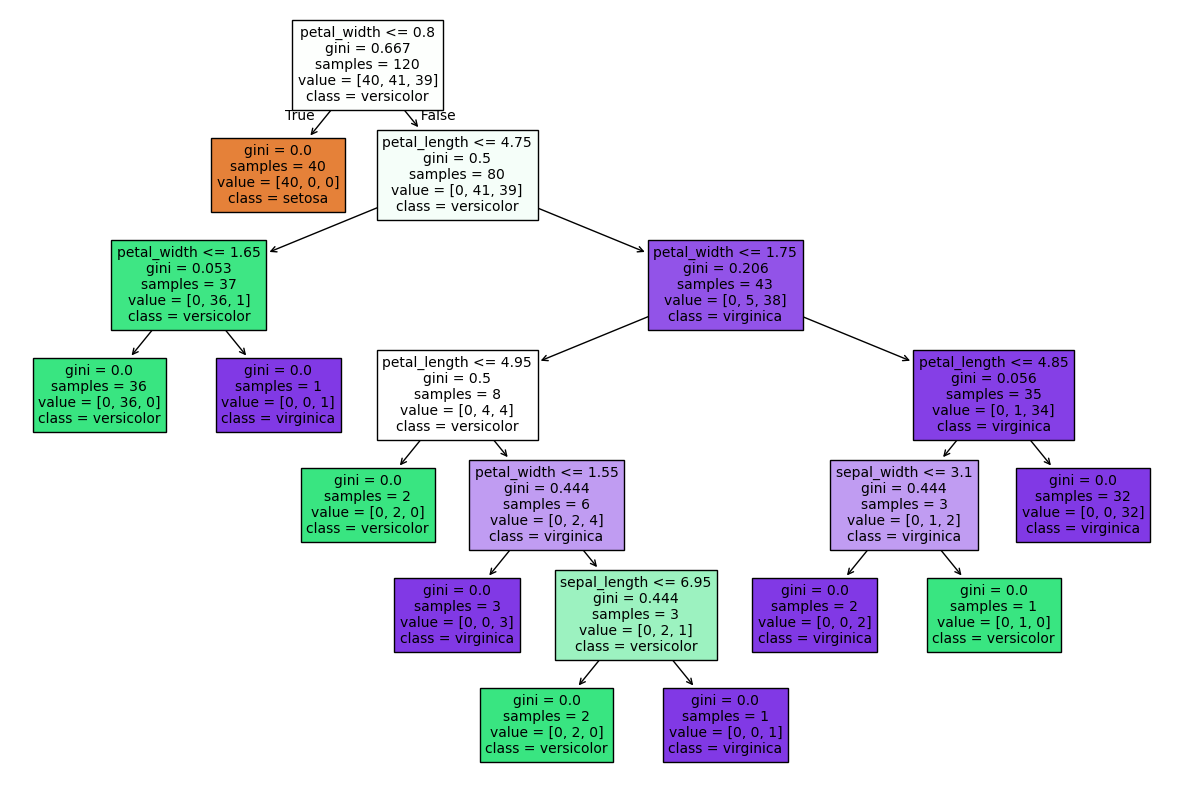

In [8]:
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(cl, filled=True, feature_names=X.columns, class_names=y.unique(), fontsize=10)
plt.show()

In [9]:
y_pred = cl.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


1.0

In [17]:
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2'],

}

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
model = DecisionTreeClassifier(max_depth = 3)
cv = GridSearchCV(model, param_grid=parameter,  cv =5 ,scoring='accuracy')

In [20]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [29]:
y_pred = cv.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)

In [32]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [34]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

